In [17]:
import matplotlib.pyplot as plt
import sys
import os.path
import numpy as np
from PIL import Image, ImageDraw

plt.axis('off')
%matplotlib inline

WIDTH = 48
HEIGHT = 64

WEATHER = ['Sunny', 'Cloudy', 'Rainy']
OCCUPIED = ['Empty', 'Occupied']
LOT = ['PUC', 'UFPR04', 'UFPR05']

# User defined variables here
# root = r'C:\Users\jacaz_000\Documents\Github\parking-lot-net\PKLot'
root = '/home/jordan/Documents/PKLot'
seg_root = os.path.join(root, 'PKLotSegmented')
lot_root = os.path.join(root, 'PKLot')

In [18]:
# Assemble giant list of filepaths from all images
lot_jpg_files = []
lot_xml_files = []
lot_meta = {'hour':[], 'minute':[], 'space':[], 'weather':[], 'lot':[]}

for path, dirs, files in os.walk(lot_root):
    # Get metadata of current folder
    tags = path.split(os.path.sep)

    lot_meta['weather'].append(tags[-2])
    lot_meta['lot'].append(tags[-3])

    # Add image files
    for f in files:
        head, ext = os.path.splitext(f)
        if ext == '.jpg' and os.path.isfile(os.path.join(path, head) + '.xml'):        
            lot_jpg_files.append(os.path.join(path, f))
            lot_xml_files.append(os.path.join(path, head) + '.xml')
            
num_lot_files = len(lot_jpg_files)
            

In [19]:
# Assemble giant list of filepaths from all images
seg_jpg_files = []
seg_meta = {'space':[], 'occupied':[], 'weather':[], 'lot':[]}

i = 0
for path, dirs, files in os.walk(seg_root):
    # Get metadata of current folder
    tags = path.split(os.path.sep)

    occupied = tags[-1]
    weather = tags[-3]
    lot = tags[-4]

    # Add image files
    for f in files:
        _, ext = os.path.splitext(f)
        if ext == '.jpg':
            seg_jpg_files.append(os.path.join(path, f))
            seg_meta['occupied'].append(occupied)
            seg_meta['weather'].append(weather)
            seg_meta['lot'].append(lot)
            i += 1
        if i % 1000 == 0:
            print '*',
        if i % 10000 == 0:
            print ' \n',
        if i % 100000 == 0:
            print '\n'
        sys.stdout.flush() 
        
            
num_seg_files = len(seg_jpg_files)
        

* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  


* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  


* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  


* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  


* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* * * * * * * * * *  
* 

In [20]:
print num_seg_files

695851


In [21]:
lot_jpg_files = np.asarray(lot_jpg_files)
lot_xml_files = np.asarray(lot_xml_files)
seg_jpg_files = np.asarray(seg_jpg_files)

In [22]:
            # Get Date and Time metadata
#           date = f[:f.find('_')]
#           year, month, day = tuple(date.split('-'))

#           time = f[f.find('_') + 1: f.find('#')]
#           hour, minute, second = tuple(time.split('_'))

#           space = int(f[f.find('#') + 1:f.find('.')])

#           # Extract image data, resize and add to file
#           im = Image.open(os.path.join(path, f))
#           im = im.resize((WIDTH, HEIGHT), Image.BICUBIC)

#           imdata = np.asarray(im.getdata())
#           imdata = imdata.reshape((3, im.height, im.width))
#           im.close()

In [23]:
import xml.etree.ElementTree as xml

def get_space_segments(lot_xml):
    rects = []
    occupied = []
    
    tree = xml.parse(lot_xml)
    root = tree.getroot()
    
    for space in root:
        if('occupied' in space.attrib.keys()):
            occupied.append(space.attrib['occupied'])
            pts = space[1]
            rect = []
            for pt in pts:
                rect.append((float(pt.attrib['x']), float(pt.attrib['y'])))
    #         print rect
            rects.append(rect)
    
    return rects, occupied
    
# get_space_segments(r'C:\Users\jacaz_000\Documents\GitHub\parking-lot-net\PKLot\PKLot\PUCPR\Cloudy\2012-09-16\2012-10-16_05_41_42.xml')

    

In [24]:
# Draw random lot images with segments shown
line_width = 5
occ_color = (255, 255, 255)
emp_color = (0, 255, 255)

for i in xrange(5):
    # Draw image
    idx = np.random.randint(num_files)
    img = Image.open(lot_jpg_files[idx])
    
    # Find and add parking space rects
    rects, occ = get_space_segments(lot_xml_files[idx])
    d = ImageDraw.Draw(img)
    for j, rect in enumerate(rects):
        if(occ[j] == '0'):
            d.line(rect + [rect[0]], width=line_width, fill=emp_color)
        else:
            d.line(rect + [rect[0]], width=line_width, fill=occ_color)
        
    plt.figure(i+1)
    plt.imshow(img)
    

NameError: name 'num_files' is not defined

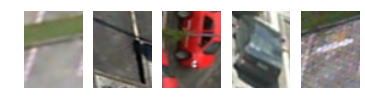

In [25]:
# Draw random space images, resized to CNN dimensions
IMG = 5

plt.subplot()
for i in xrange(IMG):
    im = Image.open(np.random.choice(seg_jpg_files))
    im_new = im.resize((WIDTH, HEIGHT), Image.BICUBIC)
    im.close()
    
    plt.subplot(1,IMG,i+1)
    plt.axis('off')
    
    plt.imshow(im_new)

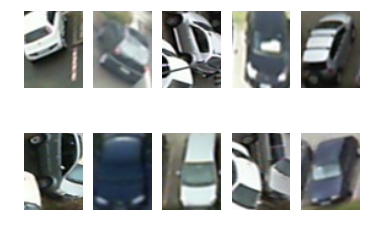

In [40]:
# Draw only one type of space
IMG = 10

plt.subplot()
for i in xrange(1,IMG+1):
    idx = None
    while idx is None or seg_meta['occupied'][idx] != 'Occupied':
        idx = np.random.randint(num_seg_files)
#         print seg_meta['occupied'][idx]
    
    im = Image.open(seg_jpg_files[idx])
    im_new = im.resize((WIDTH, HEIGHT), Image.BICUBIC)
    im.close()
    
    plt.subplot(IMG/5, 5, i)
    plt.axis('off')
    plt.imshow(im_new)

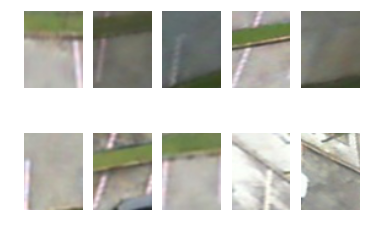

In [30]:
# Draw only one type of space
IMG = 10

plt.subplot()
for i in xrange(1,IMG+1):
    idx = None
    while idx is None or seg_meta['occupied'][idx] != 'Empty':
        idx = np.random.randint(num_seg_files)
#         print seg_meta['occupied'][idx]
    
    im = Image.open(seg_jpg_files[idx])
    im_new = im.resize((WIDTH, HEIGHT), Image.BICUBIC)
    im.close()
    
    plt.subplot(IMG/5, 5, i)
    plt.axis('off')
    plt.imshow(im_new)